# Protein Comparison

A very simple notebook to compare nutritional and price data from 2 different WHEY protein powders.
The goal of this comparison is to provide my mom with the information to make a decision of which protein powder to buy.

### Questions to be answered



1.   What is the price per portion of the powder?
2.   How much protein, and sugar are there per portion of the powder?
3.   How many portions of the cheap protein you could buy with the price of the better quality protein product.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(columns=["name", "price(MXN)", "grams per purchase", "portions per purchase", "grams per portion", "calories per portion", "protein per portion(g)", "carbohydrates per portion(g)", "sugar per portion(g)"])

In [3]:
protein1 = ["Optimum Nutrition", 1499, 2270, 74, 30.4, 117, 24, 3, 1]
protein2 = ["Redacted", 277, 780, 10, 78, 288, 42, 28, 17]

df. loc[0]=protein1
df. loc[1]=protein2

The data just added to the dataframe is direct from the protein labels, but my mom divides each portion of the [Redacted] Protein in two, as it is too big for one sitting. The portions per puchase has to be doubled and the nutritional values of the portion halved.

In [4]:
df.iloc[[1], 3] = df.iloc[[1], 3]*2
df.iloc[[1], 4:] = df.iloc[[1], 4:]/2

In [5]:
df

,name,price(MXN),grams per purchase,portions per purchase,grams per portion,calories per portion,protein per portion(g),carbohydrates per portion(g),sugar per portion(g)
0,Optimum Nutrition,1499,2270,74,30.4,117,24,3,1.0
1,Redacted,277,780,20,39.0,144,21,14,8.5


Now with the important data available to us, I want to make a bar plot to compare the nutritional values per portion of each product.

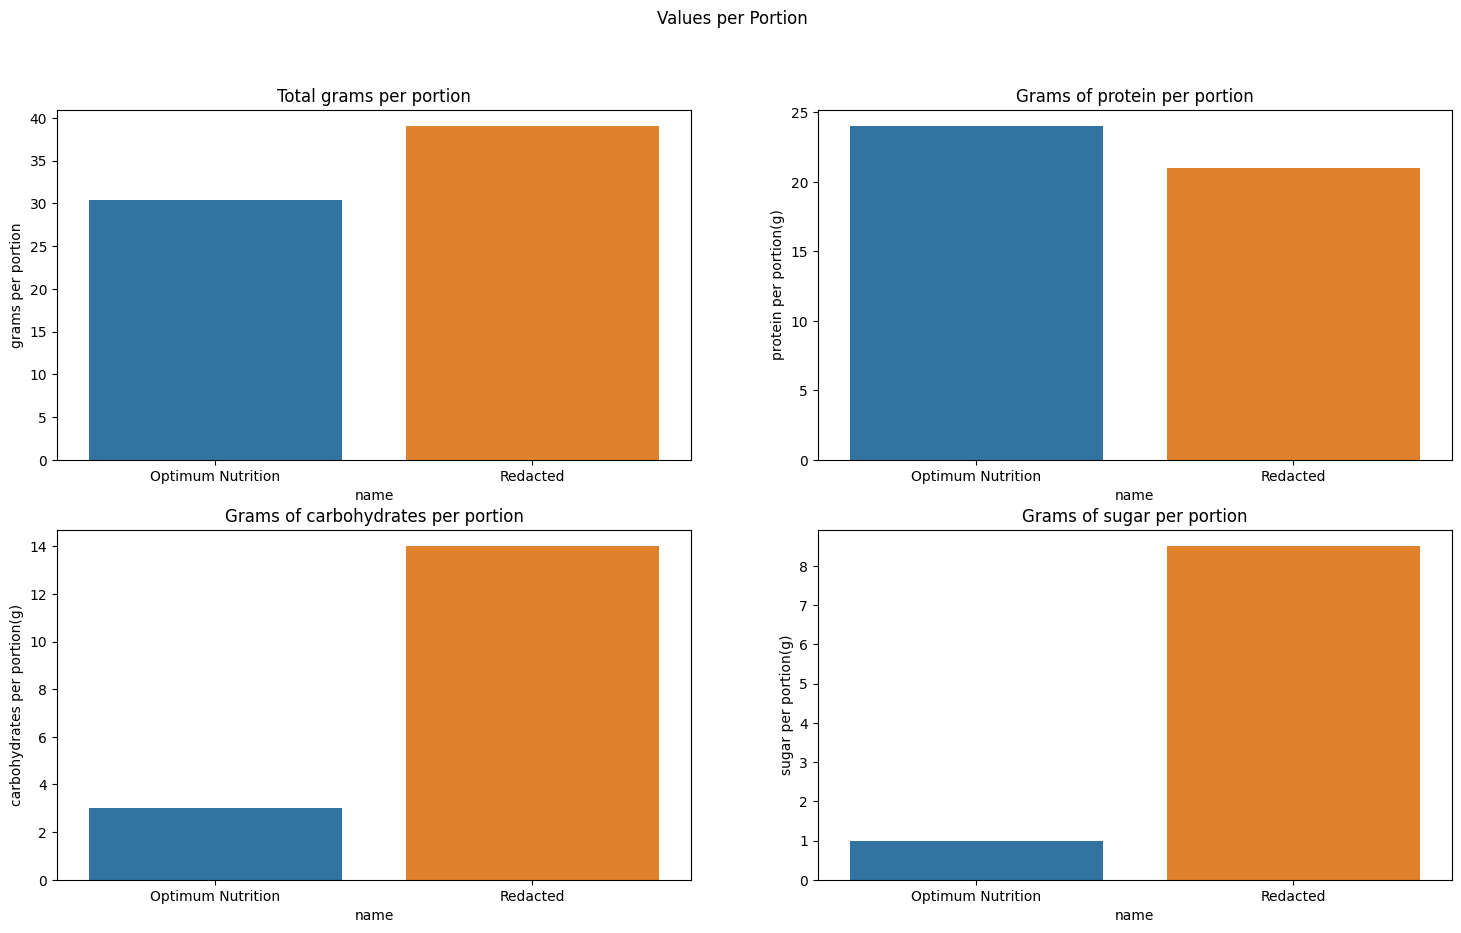

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Values per Portion')

axes[0, 0].set_title('Total grams per portion')
sns.barplot(ax=axes[0, 0],
            x = "name",
            y = "grams per portion",
            data = df)

axes[0, 1].set_title('Grams of protein per portion')
sns.barplot(ax=axes[0, 1],
            x = "name",
            y = "protein per portion(g)",
            data = df)

axes[1, 0].set_title('Grams of carbohydrates per portion')
sns.barplot(ax=axes[1, 0],
            x = "name",
            y = "carbohydrates per portion(g)",
            data = df)

axes[1, 1].set_title('Grams of sugar per portion')
sns.barplot(ax=axes[1, 1],
            x = "name",
            y = "sugar per portion(g)",
            data = df)
plt.show()

Now lets see how much is the cost per portion

In [8]:
print("The cost for each portion of Optimum Nutrition protein is {:.2f} MXN".format(df["price(MXN)"][0]/df["portions per purchase"][0]))
print("The cost for each portion of Redacted protein is {:.2f} MXN".format(df["price(MXN)"][1]/df["portions per purchase"][1]))

The cost for each portion of Optimum Nutrition protein is 20.26 MXN
The cost for each portion of Redacted protein is 13.85 MXN


## Optimum Nutrition protein is 20.26 MXN per portion
## Redacted protein is 13.85 MXN per portion

Finally, let us see how many packages of Redacted protein can you buy with the price of Optimum Nutrition Protein and how many portions will that give us.


In [17]:
print("You could buy {:.0f} packages of Redacted Protein with the price of one package of Optimum Nutrition Protein,".format(df["price(MXN)"][0]/df["price(MXN)"][1]))
print("That would leave you with {} MXN leftover.".format(df["price(MXN)"][0]%df["price(MXN)"][1]))
print("Finally, with almost the same money you could get either {} portions of Optimum Nutrition, totalling {} grams of protein,".format(df["portions per purchase"][0], df["portions per purchase"][0]*df["protein per portion(g)"][0]))
print("or 100 portions of Redacted protein, totalling {} grams of protein.".format(100*df["protein per portion(g)"][1]))

You could buy 5 packages of Redacted Protein with the price of one package of Optimum Nutrition Protein,
That would leave you with 114 MXN leftover.
Finally, with almost the same money you could get either 74 portions of Optimum Nutrition, totalling 1776 grams of protein,
or 100 portions of Redacted protein, totalling 2100 grams of protein.
